# Case Study 2 : Analyzing data from MovieLens
** Due Date: March 5, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

In [2]:
YouTubeVideo('6O43gOxtaWo', start=14)

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Helen Hong
    Haley Huang
    Tom Meagher
    Tyler Reese

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6 Pg 171-172,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to Chapter 1 of Python for Data Analysis book above.

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import Users Data
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('data/users.dat', sep = '::', header = None, names = unames, engine='python')
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
# Import Ratings Data
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('data/ratings.dat', sep = '::', header = None, names = rnames,engine='python')
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
# Import movies Data
mnames = ['movie_id','title','genres']
movies = pd.read_table('data/movies.dat', sep = '::', header = None, names = mnames,engine='python')
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Merge the data into a single data frame
data = pd.merge(pd.merge(ratings,users),movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
#Store the data into an HDF5 file
data_hdf = pd.HDFStore('data/movies.h5')
data_hdf['data1'] = data
data_hdf.close()

Compute some Summary Statistics for the data

In [9]:
#check statistics of data
data[['rating','age']].describe()

,rating,age
count,1000209.000000,1000209.000000
mean,3.581564,29.738314
std,1.117102,11.751983
min,1.000000,1.000000
25%,3.000000,25.000000
50%,4.000000,25.000000
75%,4.000000,35.000000
max,5.000000,56.000000


How many movies have an average rating over 4.5 overall?

In [10]:
# Use a pivot table to compute mean ratings by title
mean_ratings = data.pivot_table('rating',index = 'title',aggfunc = 'mean')

# Determine titles with high mean ratings
top_overall_titles = mean_ratings.index[mean_ratings >= 4.5]

#Extract those titles
top_overall_movies = mean_ratings.ix[top_overall_titles]
print 'Total movies with an average ranking of (at least) 4.5 overall:' 
print len(top_overall_movies)
print
print 'Examples:'
print top_overall_movies[:5]

Total movies with an average ranking of (at least) 4.5 overall:
29

Examples:
title
Apple, The (Sib) (1998)                4.666667
Baby, The (1973)                       5.000000
Bells, The (1926)                      4.500000
Bittersweet Motel (2000)               5.000000
Callej�n de los milagros, El (1995)    4.500000
Name: rating, dtype: float64


How many movies have an average rating over 4.5 among men? How about women?

In [11]:
# Use a pivot table to compute mean ratings per title, stratified by gender.
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

#Determine those title ranked high among females.
top_female_titles = mean_ratings.index[mean_ratings['F'] >= 4.5]

# Extract those titles
top_female_movies = mean_ratings.ix[top_female_titles]
print 'Total movies with an average ranking of (at least) 4.5 among women:' 
print len(top_female_movies)
print
print 'Examples (average rankings):'
print top_female_movies[:5]

Total movies with an average ranking of (at least) 4.5 among women:
70

Examples (average rankings):
gender                                 F         M
title                                             
24 7: Twenty Four Seven (1997)  5.000000  3.750000
Among Giants (1998)             4.666667  3.333333
Aparajito (1956)                4.666667  3.857143
Apple, The (Sib) (1998)         4.750000  4.600000
Arguing the World (1996)        4.500000  3.777778


In [12]:
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Determine which titles had high average ratings among men
top_male_titles = mean_ratings.index[mean_ratings['M'] >= 4.5]

# Extract those titles
top_male_movies = mean_ratings.ix[top_male_titles]
print 'Total movies with an average ranking of (at least) 4.5 among men:' 
print len(top_male_movies)
print
print 'Examples (average rankings):'
print top_male_movies[:5]

Total movies with an average ranking of (at least) 4.5 among men:
29

Examples (average rankings):
gender                                  F    M
title                                         
Angela (1995)                        3.00  5.0
Apple, The (Sib) (1998)              4.75  4.6
Baby, The (1973)                      NaN  5.0
Bells, The (1926)                    4.00  5.0
Callej�n de los milagros, El (1995)   NaN  4.5


How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?

In [13]:
# Restrict data to those with raters aged over 30
data_over30 = data.ix[data['age']>30]

# Use a pivot table to compute the median ratings by title on this restricted data
median_ratings = data_over30.pivot_table('rating',index = 'title',columns = ['gender'],aggfunc = 'median')

In [14]:
# Determine which movies had a high median among men and extract those titles
top_male_median_titles = median_ratings.index[median_ratings['M'] >= 4.5]
top_male_median_movies = median_ratings.ix[top_male_median_titles]

print 'Total movies with an median ranking of (at least) 4.5 among men over 30:' 
print len(top_male_median_movies)
print
print 'Examples, median scores among people over 30:'
print top_male_median_movies[:5]

Total movies with an median ranking of (at least) 4.5 among men over 30:
105

Examples, median scores among people over 30:
gender                                 F  M
title                                      
42 Up (1998)                           4  5
All Quiet on the Western Front (1930)  4  5
American Beauty (1999)                 4  5
Among Giants (1998)                    5  5
Angela (1995)                          3  5


In [15]:
# Determine which movies had a high median among men and extract those titles
top_female_median_titles = median_ratings.index[median_ratings['F'] >= 4.5]
top_female_median_movies = median_ratings.ix[top_female_median_titles]

print 'Total movies with an median ranking of (at least) 4.5 among women over 30:' 
print len(top_female_median_movies)
print
print 'Examples, median scores among people over 30:'
print top_female_median_movies[:5]

Total movies with an median ranking of (at least) 4.5 among women over 30:
187

Examples, median scores among people over 30:
gender                                            F   M
title                                                  
24 7: Twenty Four Seven (1997)                  5.0   3
400 Blows, The (Les Quatre cents coups) (1959)  5.0   4
Above the Rim (1994)                            4.5   3
Across the Sea of Time (1995)                   5.0 NaN
African Queen, The (1951)                       5.0   4


What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.

We propose the following definition of a "Popular" movie:
* Above-average total number of ratings
* Above-average rating among women (i.e. the movie's average rating among women is above the average of ALL ratings given by women)
* Above-average rating among men ((i.e. the movie's average rating among men is above the average of ALL ratings given by men)

Among these "popular" movies we determine the top 10 MOST popular by using highest average rating overall.

In [16]:
# Determine the overall total ratings and mean ratings per title
popularity_test = data.pivot_table('rating',index = 'title', aggfunc = [len, np.mean])

# Determine the mean ratings per title by gender
gender_popularity_test = data.pivot_table('rating',index = 'title', columns = 'gender', aggfunc = np.mean)

popularity_test[:5]

,len,mean
title,,
"$1,000,000 Duck (1971)",37,3.027027
'Night Mother (1986),70,3.371429
'Til There Was You (1997),52,2.692308
"'burbs, The (1989)",303,2.910891
...And Justice for All (1979),199,3.713568


In [17]:
gender_popularity_test[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [18]:
# Calculate total number of ratings for each title
ratings_by_title = data.groupby('title').size()

# Determine the average number of total ratings per title
average_total_ratings = sum(ratings_by_title)/len(ratings_by_title)

# Determine which titles had above average total ratings and isolate those titles.
high_total_titles = popularity_test.index[popularity_test['len'] >= average_total_ratings]
high_total = popularity_test.ix[high_total_titles]

high_total[:5]

,len,mean
title,,
"'burbs, The (1989)",303,2.910891
10 Things I Hate About You (1999),700,3.422857
101 Dalmatians (1961),565,3.596460
101 Dalmatians (1996),364,3.046703
12 Angry Men (1957),616,4.295455


In [19]:
# Determine the average of ALL ratings given by men and by women.
gender_average_ratings = data.pivot_table('rating', index = 'gender',aggfunc = np.mean)
gender_average_ratings

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

In [20]:
# Determine the titles with above average female ratings and isolate those titles among the movies with above average total ratings.
high_female_titles = gender_popularity_test.index[gender_popularity_test['F'] >= gender_average_ratings['F']]
high_total_female = high_total.ix[high_female_titles]

# Among the above isolated titles, determine those with above average male ratings and isolate those titles.
high_male_titles = gender_popularity_test.index[gender_popularity_test['M'] >= gender_average_ratings['M']]
high_total_female_male = high_total_female.ix[high_male_titles]

In [21]:
# Determine the popular movies, given the definition above.
from numpy import nan as NA
popular_movies = high_total_female_male.dropna(how = 'all')
popular_movies[:5]

,len,mean
title,,
12 Angry Men (1957),616,4.295455
"20,000 Leagues Under the Sea (1954)",575,3.702609
2001: A Space Odyssey (1968),1716,4.068765
"Abyss, The (1989)",1715,3.683965
"Adventures of Priscilla, Queen of the Desert, The (1994)",469,3.805970


In [22]:
# Given the popluar movies, determine the 10 most popular.
most_popular_movies = popular_movies.sort_values(by='mean',ascending = False)
most_popular_movies[:10]

,len,mean
title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Close Shave, A (1995)",657,4.520548
"Usual Suspects, The (1995)",1783,4.517106
Schindler's List (1993),2304,4.510417
"Wrong Trousers, The (1993)",882,4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),470,4.491489
Raiders of the Lost Ark (1981),2514,4.477725


Make some conjectures about how easy various groups are to please? Support your answers with data!

Conjecture 1.) The older a person gets, the more difficult they are to please.

In [23]:
# Compute average rating by age group
age_avg_ratings = data.pivot_table('rating', index = 'age',aggfunc = np.mean)
age_avg_ratings

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

In [24]:
# Compute weighted average by weighting each rating by the total number of ratings that individual submits
avg_by_user = data.pivot_table('rating',index = ['age','user_id'], aggfunc = [ len , np.mean])
avg_by_user[:10]

avg_ratings = np.mean(avg_by_user['len'])

avg_by_user['weight'] = avg_by_user['len']/avg_ratings
avg_by_user['weighted_mean'] = avg_by_user['mean']*avg_by_user['weight']

age_avg_weighted_ratings = avg_by_user.pivot_table('weighted_mean', index = avg_by_user.index.droplevel(1), aggfunc = np.mean)
age_avg_weighted_ratings

age
1     2.627286
18    3.524510
25    4.040247
35    3.644629
45    3.340652
50    3.278268
56    2.321259
Name: weighted_mean, dtype: float64

In [25]:
# Compute average age per rating
avg_age_ratings = data.pivot_table('age', index = 'rating',aggfunc = np.mean)
avg_age_ratings

rating
1    27.411756
2    28.607603
3    29.730035
4    30.154405
5    30.221130
Name: age, dtype: float64

In [113]:
age_counts = data.pivot_table('title', index='age', columns='rating', aggfunc='count')
age_counts.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
print 'Frequency of Age Groups Ratings'
print age_counts

Frequency of Age Groups Ratings
rating        1      2       3       4      5
age                                          
Under 18   2238   2983    6380    8808   6802
18-24     13063  22073   47601   60241  40558
25-34     23898  44817  104287  136824  85730
35-44      9067  20253   52990   71983  44710
45-49      3409   8437   22311   30334  19142
50-55      2948   5993   18465   26484  18600
56+        1551   3001    9163   14297  10768


In [114]:
#normalize
age_counts_norm = age_counts.div(age_counts.sum(1).astype(float), axis=0)
age_counts_norm

rating,1,2,3,4,5
age,,,,,
Under 18,0.082246,0.109625,0.234464,0.323693,0.249972
18-24,0.071174,0.120265,0.259355,0.328224,0.220981
25-34,0.060416,0.113301,0.263647,0.345903,0.216733
35-44,0.045562,0.101772,0.266277,0.361718,0.224670
45-49,0.040761,0.100881,0.266773,0.362704,0.228881
50-55,0.040668,0.082673,0.254725,0.365347,0.256587
56+,0.039995,0.077385,0.236282,0.368669,0.277669


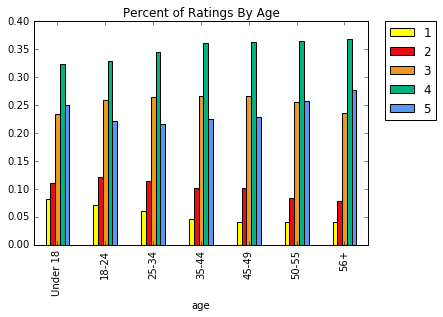

In [115]:
# plot percentage of each rate from each age group
age_counts_norm.plot(ylim=[0,0.4],kind='bar', color=['yellow','#E50E14','#ec971f','#00b27f','#5898f1'],title = "Percent of Ratings By Age").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Conclusion: False.  In fact, an older person is more likely than a younger person to give a rating of 5, and less likely to give a rating of 1.  More details presented in the report.

Conjecture 2.) Tired people are more easy to please

In [29]:
import time
timestamps = data['timestamp']

# Time stamps are reported in seconds since epoch.  Convert these values to local time, and extract the hour.
hour = [time.localtime(stamp).tm_hour for stamp in timestamps.values]
hour_series = pd.DataFrame(hour, index=data.index)

# Append the hour each rating was reported to the data set.
data['hour'] = hour_series

In [30]:
# Use a pivot table to determine the average overall rating by hour.
avg_by_hour = data.pivot_table('rating',index = 'hour', aggfunc = np.mean)
avg_by_hour

hour
0     3.531166
1     3.532652
2     3.522310
3     3.608106
4     3.552627
5     3.550828
6     3.560344
7     3.547436
8     3.606297
9     3.573076
10    3.600959
11    3.618682
12    3.580945
13    3.606272
14    3.601401
15    3.580115
16    3.599484
17    3.564582
18    3.586641
19    3.601357
20    3.577783
21    3.565464
22    3.614140
23    3.575760
Name: rating, dtype: float64

In [31]:
wee_hours_data = data[np.logical_or(data['hour']>= 22,data['hour']<=5)]
wee_hours_5 = wee_hours_data[wee_hours_data['rating']==5]
wee_hours_1 = wee_hours_data[wee_hours_data['rating']==1]

total_5 = data[data['rating']==5]
total_1 = data[data['rating']==1]

wee_hours_5_percent = float(len(wee_hours_5))/len(wee_hours_data)
wee_hours_1_percent = float(len(wee_hours_1))/len(wee_hours_data)

total_5_percent = float(len(total_5))/len(data)
total_1_percent = float(len(total_1))/len(data)

compdat = {'Percent Ratings 5':[wee_hours_5_percent , total_5_percent], 
                          'Percent Raings 1':[wee_hours_1_percent, total_1_percent]}
comp = pd.DataFrame(compdat, columns=['Percent Ratings 5','Percent Raings 1'], index=['Wee Hours','Total'])
comp

,Percent Ratings 5,Percent Raings 1
Wee Hours,0.223796,0.058072
Total,0.226263,0.056162


Conclusion: False.  If the conjecture were true, we would expect to see noticeably higher average ratings at very large and very small hours.  This is clearly not the case.

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

Plot a histogram of the ratings of all movies.

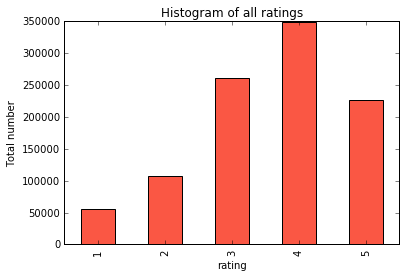

In [32]:
#Plot a histogram of the ratings of all movies.
Rating_all=data.pivot_table('title',index='rating',aggfunc='count')
Rating_all.plot(kind='bar', color='#FA5744')
plt.title('Histogram of all ratings')
plt.ylabel('Total number')

Plot a histogram of the number of ratings each movie recieved.

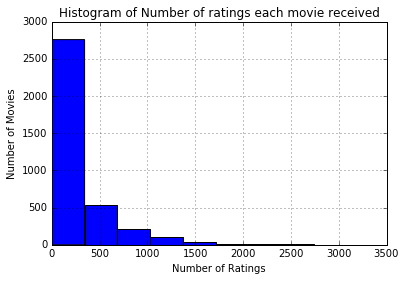

In [33]:
#Plot a histogram of the number of ratings each movie recieved.
Rating_each=data.pivot_table('rating',index='title',aggfunc='count')
Rating_each.hist()
plt.title('Histogram of Number of ratings each movie received')
plt.ylabel('Number of Movies')
plt.xlabel('Number of Ratings')

Plot a histogram of the average rating for each movie.

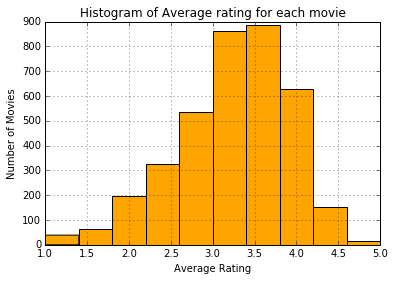

In [34]:
#Plot a histogram of the average rating for each movie.
Avg_rating_each=data.pivot_table('rating',index='title',aggfunc='mean')
Avg_rating_each.hist(color='orange')
plt.title('Histogram of Average rating for each movie')
plt.ylabel('Number of Movies')
plt.xlabel('Average Rating')

Plot a histogram of the average rating for movies which are rated more than 100 times.

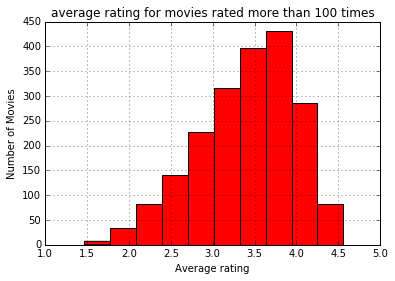

In [35]:
#Plot a histogram of the average rating for movies which are rated more than 100 times.
rating_by_title = data.groupby('title').size() 
active_titles = rating_by_title.index[rating_by_title > 100] 
avg_ratings_each_active = Avg_rating_each.ix[active_titles] 
avg_ratings_each_active.hist(color='red')
plt.title('average rating for movies rated more than 100 times')
plt.ylabel('Number of Movies')
plt.xlabel('Average rating')

Make some conjectures about the distribution of ratings? Support your answers with data!

Conjecture 1: Movies with fewer total ratings have a distribution of all ratings which is closer to a uniform distribution due to a larger percent of low-end extreme ratings.

In [36]:
# Select the movies with less than half the average number of total ratings.
rating_by_title = data.groupby('title').size() 
inactive_titles = rating_by_title.index[rating_by_title <= average_total_ratings/2]

inactive = [title in inactive_titles.values for title in data['title']]
inactive_series = pd.DataFrame(inactive, index = data.index)
data['Inactive'] = inactive_series

inactive_data = data[data['Inactive']]

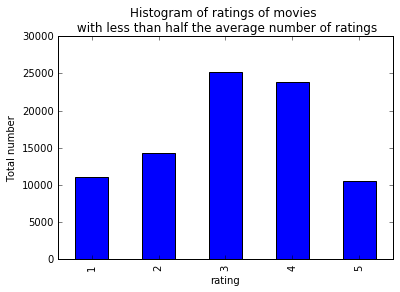

In [37]:
inactive_rating_all=inactive_data.pivot_table('title',index='rating',aggfunc='count')
inactive_rating_all.plot(kind='bar', color='blue')
plt.title('Histogram of ratings of movies \n with less than half the average number of ratings')
plt.ylabel('Total number')

In [38]:
# Select the movies with less more than twice the average number of total ratings.
rating_by_title = data.groupby('title').size() 
wayactive_titles = rating_by_title.index[rating_by_title >= average_total_ratings*2]

wayactive = [title in wayactive_titles.values for title in data['title']]
wayactive_series = pd.DataFrame(wayactive, index = data.index)
data['wayactive'] = wayactive_series

wayactive_data = data[data['wayactive']]

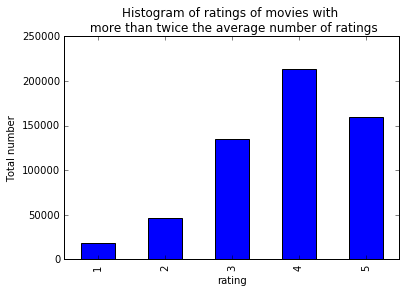

In [39]:
wayactive_rating_all=wayactive_data.pivot_table('title',index='rating',aggfunc='count')
wayactive_rating_all.plot(kind='bar', color='blue')
plt.title('Histogram of ratings of movies with \n more than twice the average number of ratings')
plt.ylabel('Total number')

Conjecture 2: The distribution of all ratings of older movies is less normally-distributed than that of newer movies.  Newer movies are likely being watched by audiences looking to be entertained.  Those watching older movies (i.e. movies made before 1960) likely have some nostalgia tied up in these older films.

In [40]:
# Extract the year from the title

def extract(string, start='(', stop=')'):
        while string.index(stop) - (string.index(start)+1)!= 4:
            string = string[:string.index(start)] + string[string.index(stop)+1:]
        return string[string.index(start)+1:string.index(stop)]
    
titles = data['title']
year = [int(extract(title)) for title in titles]
year_series = pd.DataFrame(year, index=data.index)
data['year'] = year_series

data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,hour,Inactive,wayactive,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,17,False,True,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,16,False,True,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,18,False,True,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,13,False,True,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1,False,True,1975


In [41]:
year_array = list(set(data['year'].values))
average_year = int(float(sum(year_array))/len(year_array))
average_year

1959

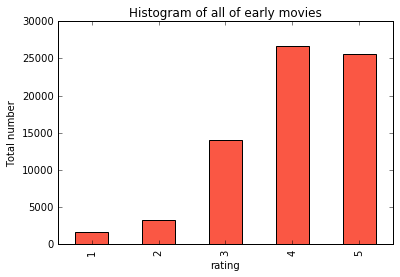

In [116]:
old_data = data[data['year']<= average_year]
old_rating_all=old_data.pivot_table('title',index='rating',aggfunc='count')
old_rating_all.plot(kind='bar', color='#FA5744')
plt.title('Histogram of all of early movies')
plt.ylabel('Total number')

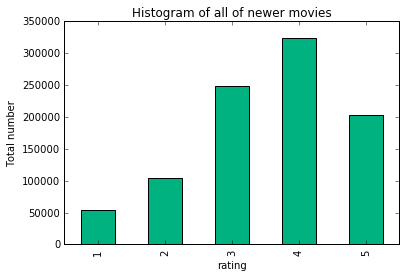

In [117]:
newer_data = data[data['year']>= average_year]
new_rating_all=newer_data.pivot_table('title',index='rating',aggfunc='count')
new_rating_all.plot(kind='bar', color='#00b27f')
plt.title('Histogram of all of newer movies')
plt.ylabel('Total number')

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [44]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [45]:
# among total6040 users, how many female? how may male?
users.groupby('gender').size()

gender
F    1709
M    4331
dtype: int64

In [46]:
#among total 100209 rating records, how many was made by female? how many was made by male?
data.groupby('gender').size()

gender
F    246440
M    753769
dtype: int64

Make a scatter plot of men versus women and their mean rating for every movie.

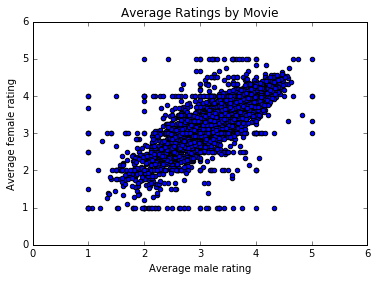

In [47]:
# Use a pivot table to compute mean ratings per title by gender
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Scatter this data.
plt.scatter(mean_ratings['M'], mean_ratings['F'])
plt.title('Average Ratings by Movie')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.

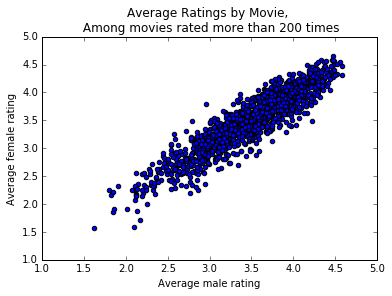

In [48]:
# Determine titles with more than 200 total ratings.
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title > 200]

# Extract these titles
over_200_mean_ratings = mean_ratings.ix[active_titles]

#Produce scatter plot
plt.scatter(over_200_mean_ratings['M'], over_200_mean_ratings['F'])
plt.title('Average Ratings by Movie, \n Among movies rated more than 200 times')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!

In [49]:
# Compute the correlation coefficient
print 'correlation coefficient between averege male and female ratings: {0}'.format(mean_ratings.M.corr(mean_ratings.F))

correlation coefficient between averege male and female ratings: 0.763189890858


In [50]:
# Based on scatter plots above, it is clear that men and women tend to agree more when the movies have a higher total number
# of ratings.  Calculate the correlation coeffcient in this case
print 'correlation coefficient between averege male and female ratings among movies with over 200 ratings: {0}'.format(
    over_200_mean_ratings.M.corr(over_200_mean_ratings.F))

correlation coefficient between averege male and female ratings among movies with over 200 ratings: 0.918361385703


In [51]:
# Given this observed in crease in correlation coefficient, we now compute the correlation coefficient based on the number of 
# total ratings:
ratings_by_title = data.groupby('title').size()
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

i = 1
IND = ['0']
RAT = [0]
while i < max(ratings_by_title):
    titles = ratings_by_title.index[np.logical_and(ratings_by_title >= i, ratings_by_title < 2*i)]
    subset_mean_ratings = mean_ratings.ix[titles]
    correl = subset_mean_ratings.M.corr(subset_mean_ratings.F)
    IND.append('Total ratings between {0} and {1}'.format(i, 2*i))
    RAT.append(correl)
    j = i
    i = 2*j

correl_comp = pd.Series(RAT, index=IND)
correl_comp.index.name = 'Total number of Ratings'
correl_comp.name = 'Correlation coefficient between average Male and Female Ratings per Movie'

correl_comp

Total number of Ratings
0                                      0.000000
Total ratings between 1 and 2               NaN
Total ratings between 2 and 4          0.398274
Total ratings between 4 and 8          0.343599
Total ratings between 8 and 16         0.515807
Total ratings between 16 and 32        0.573141
Total ratings between 32 and 64        0.786651
Total ratings between 64 and 128       0.867470
Total ratings between 128 and 256      0.916493
Total ratings between 256 and 512      0.924317
Total ratings between 512 and 1024     0.880580
Total ratings between 1024 and 2048    0.852633
Total ratings between 2048 and 4096    0.850174
Name: Correlation coefficient between average Male and Female Ratings per Movie, dtype: float64

This data seems to be somewhat misleading.  Based on the high correlation values, it seems that the ratings between men and women are similar, especially among movies watched more than 200 times.  However, this is the correlation between the MEAN rating per title between men and women.  What this is saying is that ON AVERAGE,  men and women rate movies similarly.  This doesn't indicate that the ratings themselves are actually similar!  For example, there could be a movie in which both men and women have an average rating of 3, but women rate it as either a 1 or a 5 and all men rate it as 3.  We need to explore the data more to understand if the ratings between men and women are actually similar.

For example, rather than consider mean rating, let's consider the percentage of ratings that are a 5.  That is, for each title we compute the total number of 5 ratings given by men and divide by the total number of ratings given by men.  We then determine the correlation in this data.

In [52]:
fives_data = data[data['rating']==5]

five_ratings = fives_data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'count')
total_ratings = data.pivot_table('rating',index ='title',columns = 'gender',aggfunc = 'count')

fives_percent = pd.DataFrame(index = five_ratings.index)
fives_percent['M'] = five_ratings['M']/total_ratings['M']
fives_percent['F'] = five_ratings['F']/total_ratings['F']

print 'correlation coefficient between percent ratings of 5 by male and female per title: {0}'.format(fives_percent.M.corr(fives_percent.F))

correlation coefficient between percent ratings of 5 by male and female per title: 0.729591341835


correlation coefficient between percent ratings of 5 by male and female among titles with more than 200 ratings: 0.889390422524


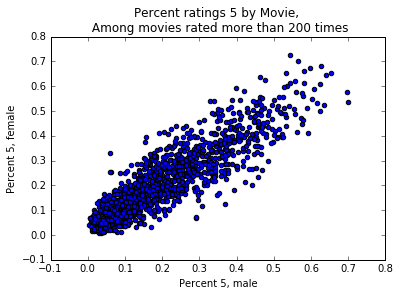

In [53]:
over_200_fives_percent = fives_percent.ix[active_titles]

print 'correlation coefficient between percent ratings of 5 by male and female among titles with more than 200 ratings: {0}'.format(over_200_fives_percent.M.corr(over_200_fives_percent.F))

plt.scatter(over_200_fives_percent['M'], over_200_fives_percent['F'])
plt.title('Percent ratings 5 by Movie, \n Among movies rated more than 200 times')
plt.ylabel('Percent 5, female')
plt.xlabel('Percent 5, male')

Similarly, we perform the same analysis for number of ratings of 1 or 2

In [54]:
low_data = data[data['rating']<= 2]

low_ratings = low_data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'count')
total_ratings = data.pivot_table('rating',index ='title',columns = 'gender',aggfunc = 'count')

low_percent = pd.DataFrame(index = low_ratings.index)
low_percent['M'] = low_ratings['M']/total_ratings['M']
low_percent['F'] = low_ratings['F']/total_ratings['F']

print 'correlation coefficient between percent ratings of 1 or 2 by male and female per title: {0}'.format(low_percent.M.corr(low_percent.F))

correlation coefficient between percent ratings of 1 or 2 by male and female per title: 0.801000811664


correlation coefficient between percent ratings of 5 by male and female among titles with more than 200 ratings: 0.901351061924


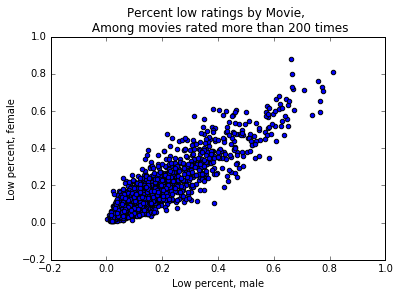

In [55]:
over_200_low_percent = low_percent.ix[active_titles]

print 'correlation coefficient between percent ratings of 5 by male and female among titles with more than 200 ratings: {0}'.format(over_200_low_percent.M.corr(over_200_low_percent.F))

plt.scatter(over_200_low_percent['M'], over_200_low_percent['F'])
plt.title('Percent low ratings by Movie, \n Among movies rated more than 200 times')
plt.ylabel('Low percent, female')
plt.xlabel('Low percent, male')

This indicates that male and females tend to agree on average and in distribution (especially on movies rated more than 200 times).  This does not, however, indicate we can predict a single male rating given female ratings!  The average behavior of the two is similar, but not single instances.

Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

Observation 1.) The percent of each rating given by men and women overall is nearly identical.

Frequency of men vs. wemen Ratings
rating      1      2       3       4       5
gender                                      
F       13347  24548   62966   87033   58546
M       42827  83009  198231  261938  167764

Percent of each Rating, men vs women
rating         1         2         3         4         5
gender                                                  
F       0.054159  0.099610  0.255502  0.353161  0.237567
M       0.056817  0.110125  0.262986  0.347504  0.222567


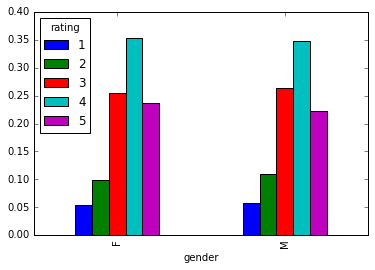

In [56]:
#freqency of men vs. wen ratings for each age group
gender_counts = data.pivot_table('title', index='gender', columns='rating', aggfunc='count')
print 'Frequency of men vs. wemen Ratings'
print gender_counts

#normalize to sum to 1, giving us the percent of each rating given by men and women.
gender_counts_norm = gender_counts.div(gender_counts.sum(1).astype(float), axis=0)
gender_counts_norm
gender_counts_norm.plot(kind='bar')

print
print 'Percent of each Rating, men vs women'
print gender_counts_norm

In [57]:
# Calculate the correlation coefficient among these average ratings.
gender_counts_norm.ix['M'].corr(gender_counts_norm.ix['F'])

0.99699644845828772

Conjecture 1.) People rate more similarly when they are tired.

In [58]:
import time

# Convert time stamps to local time and extract the hour.
timestamps = data['timestamp']
hour = [time.localtime(stamp).tm_hour for stamp in timestamps.values]
hour_series = pd.DataFrame(hour, index=data.index)
data['hour'] = hour_series

In [59]:
# Isolate data for ratings submitted between 10PM and 5AM local time
wee_hours_data = data[np.logical_or(data['hour']>= 22,data['hour']<=5)]

# Determine the average ratings per title by gender during these late-night hours.
wee_hours_mean_ratings = wee_hours_data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = np.mean)

wee_hours_mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",2.666667,3.000000
'Night Mother (1986),3.285714,3.666667
'Til There Was You (1997),2.750000,2.875000
"'burbs, The (1989)",3.045455,2.887097
...And Justice for All (1979),3.615385,3.577778


In [60]:
#Calculate the correlation coefficient.
print 'Correlation coefficient between averege male and female ratings between 10PM and 5AM: {0}'.format(
    wee_hours_mean_ratings.M.corr(wee_hours_mean_ratings.F))

Correlation coefficient between averege male and female ratings between 10PM and 5AM: 0.643913101238


In [61]:
# We already know that men and women tend to disagree on movies with lower total ratings. Segment from the late-night data those with
# high total numbers of ratings.
wee_hours_over_200_mean_ratings = wee_hours_mean_ratings.ix[active_titles]
wee_hours_over_200_mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",3.045455,2.887097
10 Things I Hate About You (1999),3.693333,3.392857
101 Dalmatians (1961),3.775510,3.540984
101 Dalmatians (1996),3.216216,2.866667
12 Angry Men (1957),4.218750,4.307692


In [62]:
#Compute Correlation Coefficient
'Correlation coefficient between averege male and female ratings between 10PM and 5AM, among movies with at least 200 total ratings: {0}'.format(wee_hours_over_200_mean_ratings.M.corr(wee_hours_over_200_mean_ratings.F))

'Correlation coefficient between averege male and female ratings between 10PM and 5AM, among movies with at least 200 total ratings: 0.864535181026'

Conclusion: False.  Both correlation coefficients actually went down by about 0.1: this change in the largest significant digit should be meaningful.  That is, during late night/early morning hours, even the average behavior between the two genders is less correlated, and thus they are not behaving similarly

Conjecture 2.) Genders agree on what is "funny"!

In [63]:
# Determine which movies have "Comedy" listed within its genres.
genres = data['genres']
all_genres = [string.split('|') for string in genres]
comedy_truth =  [ 'Comedy' in genres for genres in all_genres]
comedy_series = pd.DataFrame(comedy_truth, index=data.index)
data['comedy'] = comedy_series

comedy_data = data.ix[data['comedy'] == True]


In [64]:
# Determine comedies with at least 100 ratings
comedy_ratings_by_title = comedy_data.groupby('title').size()
comedy_active_titles = comedy_ratings_by_title.index[comedy_ratings_by_title > 100]

# Extract these titles
comedy_mean_ratings = comedy_data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')
active_comedy_mean_ratings = comedy_mean_ratings.ix[comedy_active_titles]
active_comedy_mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1996),3.240000,2.911215
20 Dates (1998),2.620690,2.918182
200 Cigarettes (1999),3.169014,2.700000
28 Days (2000),3.209424,2.977707
8 Heads in a Duffel Bag (1997),2.310345,2.318966
Abbott and Costello Meet Frankenstein (1948),3.365854,3.460606
About Last Night... (1986),3.188679,3.140909


In [65]:
# Compute correlation between average men's and women's ratings.
active_comedy_mean_ratings.M.corr(active_comedy_mean_ratings.F)

0.91419686641637254

In [66]:
from sklearn import cross_validation, linear_model, feature_selection, metrics

[ 0.44088472]
[[ 0.89094821]]
training error
0.050006497407
testing error
0.0553898637218


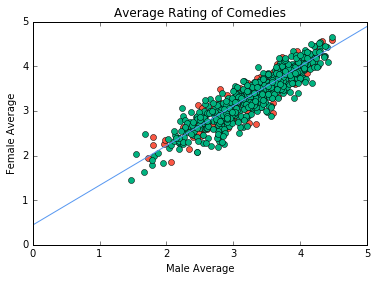

In [120]:
# Train a linear model to examine predictability

# Can't have any NaN values for linear regression.
active_comedy_mean_ratings = active_comedy_mean_ratings.dropna()

# Select out our predictor columns and our response columns
X = active_comedy_mean_ratings.ix[:,['M']]
y = active_comedy_mean_ratings.ix[:,['F']]

# Split the data into training data and testing data
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Plot the data and the model
plotX = np.linspace(0,5,100)
plotY = reg.predict(np.matrix(plotX).T)
plt.plot(X_train,y_train,'o', color='#FA5744')
plt.plot(X_test,y_test,'o', color='#00b27f')
plt.plot(plotX,plotY,'-', color='#5898f1')
plt.title('Average Rating of Comedies')
plt.ylabel('Female Average')
plt.xlabel('Male Average')

# Compute the slope and intercept of the linear model
print reg.intercept_
# Beta_1
print reg.coef_

# Compute testing and training error.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

As before, we consider the percent ratings of 5 (per title) given by each age group.

In [68]:
comedy_fives_data = comedy_data[comedy_data['rating']==5]

comedy_gender_fives = comedy_fives_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')
comedy_gender_totals = comedy_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')

comedy_gender_percents = comedy_gender_fives / comedy_gender_totals
comedy_gender_percents = comedy_gender_percents.ix[active_titles]

comedy_gender_percents.M.corr(comedy_gender_percents.F)

0.88899916443576532

[ 0.02754434]
[[ 0.89307391]]
training error
0.00322834480496
testing error
0.00432014960466


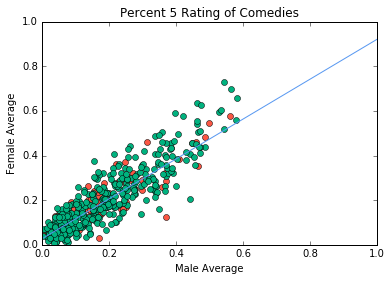

In [121]:
# Train a linear model to examine predictability

# Can't have any NaN values for linear regression.
comedy_gender_percents = comedy_gender_percents.dropna()

# Select out our predictor columns and our response columns
X = comedy_gender_percents.ix[:,['M']]
y = comedy_gender_percents.ix[:,['F']]

# Split the data into training data and testing data
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Plot the data and the model
plotX = np.linspace(0,1,100)
plotY = reg.predict(np.matrix(plotX).T)
plt.plot(X_train,y_train,'o', color='#FA5744')
plt.plot(X_test,y_test,'o', color='#00b27f')
plt.plot(plotX,plotY,'-', color='#5898f1')
plt.title('Percent 5 Rating of Comedies')
plt.ylabel('Female Average')
plt.xlabel('Male Average')

# Compute the slope and intercept of the linear model
print reg.intercept_
# Beta_1
print reg.coef_

# Compute testing and training error.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

And the percent of low (1 or 2) ratings.

In [70]:
comedy_low_data = comedy_data[comedy_data['rating']<=2]

comedy_low = comedy_low_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')
comedy_totals = comedy_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')

comedy_low_percents = comedy_low / comedy_totals
comedy_low_percents = comedy_low_percents.ix[active_titles]

comedy_low_percents.M.corr(comedy_low_percents.F)

0.86283900336770658

[ 0.0205238]
[[ 0.81631571]]
training error
0.00474895740775
testing error
0.00494794170384


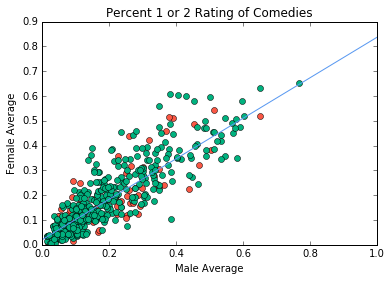

In [122]:
# Train a linear model to determine predictability

# Can't have any NaN values for linear regression.
comedy_low_percents = comedy_low_percents.dropna()

# Select out our predictor columns and our response columns
X = comedy_low_percents.ix[:,['M']]
y = comedy_low_percents.ix[:,['F']]

# Split the data into training data and testing data
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Plot the data and the model
plotX = np.linspace(0,1,100)
plotY = reg.predict(np.matrix(plotX).T)
plt.plot(X_train,y_train,'o', color='#FA5744')
plt.plot(X_test,y_test,'o', color='#00b27f')
plt.plot(plotX,plotY,'-', color='#5898f1')
plt.title('Percent 1 or 2 Rating of Comedies')
plt.ylabel('Female Average')
plt.xlabel('Male Average')

# Compute the slope and intercept of the linear model
print reg.intercept_
# Beta_1
print reg.coef_

# Compute testing and training error.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

Conjecture 3.) Men and Women rate similarly on highly-watched movies made most recently.

correlation coefficient between percent average males and females per title: 0.923782703492


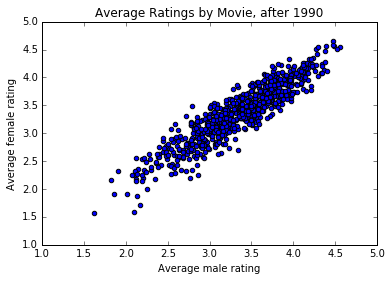

In [72]:
# Extract those movies made in the last 10 years of those available.
newest_data = data[data['year']>= 1990]

# Use a pivot table to compute mean ratings per title by gender
newest_mean_ratings = newest_data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

over_200_newest_mean_ratings = newest_mean_ratings.ix[active_titles]

# Scatter this data.
plt.scatter(over_200_newest_mean_ratings['M'], over_200_newest_mean_ratings['F'])
plt.title('Average Ratings by Movie, after 1990')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

print 'correlation coefficient between percent average males and females per title: {0}'.format(
    over_200_newest_mean_ratings.M.corr(over_200_newest_mean_ratings.F))

Correlation coefficient between percent ratings of 5 between males and females by year of movie release: 0.902497643804


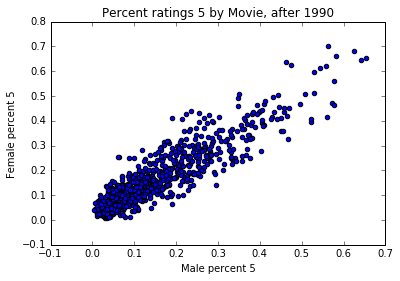

In [73]:
# Compute the percent 5 ratings by males and females for movies made in each year of this 10 year window.

new_fives_data = newest_data[newest_data['rating']==5]

year_gender_fives = new_fives_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')
year_gender_totals = newest_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')

year_gender_percents = year_gender_fives / year_gender_totals
year_gender_percents = year_gender_percents.ix[active_titles]

# Scatter this data.
plt.scatter(year_gender_percents['M'], year_gender_percents['F'])
plt.title('Percent ratings 5 by Movie, after 1990')
plt.ylabel('Female percent 5')
plt.xlabel('Male percent 5')

print 'Correlation coefficient between percent ratings of 5 between males and females by year of movie release: {0}'.format(
    year_gender_percents.M.corr(year_gender_percents.F))

We see that, for movies made in the 90's, the correlation coefficient for the percent of ratings given as 5 between males and females is
0.9023! And the correlation coefficient for the percent of ratings given as one or two (based on the year the movie was released in the 90's) is 0.905

Correlation between percent ratings of 1 or 2 between males and females on movies with the same release year: 0.904801037972


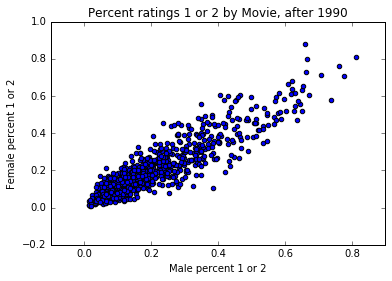

In [74]:
new_low_data = newest_data[newest_data['rating']<=2]

year_low = new_low_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')
year_totals = newest_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')

year_low_percents = year_low / year_totals
year_low_percents = year_low_percents.ix[active_titles]

plt.scatter(year_low_percents['M'], year_low_percents['F'])
plt.title('Percent ratings 1 or 2 by Movie, after 1990')
plt.ylabel('Female percent 1 or 2')
plt.xlabel('Male percent 1 or 2')

print 'Correlation between percent ratings of 1 or 2 between males and females on movies with the same release year: {0}'.format(
   year_low_percents.M.corr(year_low_percents.F))

In [75]:
# Train a linear model to predict average ratings between genders.

In [76]:
from sklearn import cross_validation, linear_model, feature_selection, metrics

In [77]:
# Can't have any NaN values for linear regression.
over_200_newest_mean_ratings = over_200_newest_mean_ratings.dropna()

# Select out our predictor columns and our response columns
X = over_200_newest_mean_ratings.ix[:,['M']]
y = over_200_newest_mean_ratings.ix[:,['F']]

# Split the data into training data and testing data
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)

In [78]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Compute the slope and intercept of the linear model
print reg.intercept_
# Beta_1
print reg.coef_

[ 0.40645463]
[[ 0.89016084]]


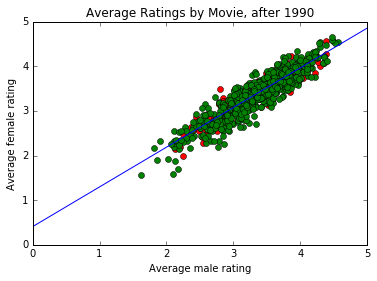

In [79]:
# Plot the data and the model
plotX = np.linspace(0,5,100)
plotY = reg.predict(np.matrix(plotX).T)
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(plotX,plotY,'b-')
plt.title('Average Ratings by Movie, after 1990')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

In [80]:
# Compute testing and training error.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

training error
0.0326201793902
testing error
0.0409264009475


In [81]:
# Train a linear model to predict percent of ratings given as 5 per-movie between genders.

[ 0.03196219]
[[ 0.92634045]]
training error
0.00270975462556
testing error
0.00294334066126


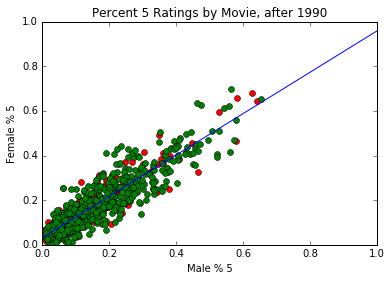

In [82]:
# Can't have any NaN values for linear regression.
year_gender_percents = year_gender_percents.dropna()

# Select out our predictor columns and our response columns
X = year_gender_percents.ix[:,['M']]
y = year_gender_percents.ix[:,['F']]

# Split the data into training data and testing data
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Plot the data and the model
plotX = np.linspace(0,1,100)
plotY = reg.predict(np.matrix(plotX).T)
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(plotX,plotY,'b-')
plt.title('Percent 5 Ratings by Movie, after 1990')
plt.ylabel('Female % 5')
plt.xlabel('Male % 5')

# Compute the slope and intercept of the linear model
print reg.intercept_
# Beta_1
print reg.coef_

# Compute testing and training error.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

In [83]:
# Train a linear model to predict percent of ratings given as 1 or 2 per-movie between genders.

[ 0.02406144]
[[ 0.9062246]]
training error
0.00456266702216
testing error
0.00400635563861


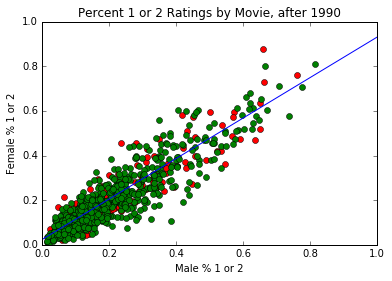

In [84]:
# Can't have any NaN values for linear regression.
year_low_percents = year_low_percents.dropna()

# Select out our predictor columns and our response columns
X = year_low_percents.ix[:,['M']]
y = year_low_percents.ix[:,['F']]

# Split the data into training data and testing data
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Plot the data and the model
plotX = np.linspace(0,1,100)
plotY = reg.predict(np.matrix(plotX).T)
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(plotX,plotY,'b-')
plt.title('Percent 1 or 2 Ratings by Movie, after 1990')
plt.ylabel('Female % 1 or 2')
plt.xlabel('Male % 1 or 2')

# Compute the slope and intercept of the linear model
print reg.intercept_
# Beta_1
print reg.coef_

# Compute testing and training error.
print 'training error'
print metrics.mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,reg.predict(X_test))

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  Convince your boss that your conjecture is correct!

Online movie services such as Netflix acquire new customers every day.  Without any previous movie ratings to analyze, Netflix must recommend movies to new customers based solely upon their registration information.  This initial recommendation is extremely important- Netflix want's its new customers to have a very positive first experience.  While there are many facets to this question, we ask the following: what genre of movie should Netflix recommend to a first time user?  

This question is extremely broad so we asked the following very specific questions:
- What is the best time of day to recommend a drama?
- Which occupation is most likely to enjoy a comedy?
- What age group watches the most adventure movies?

A good way to attack this question is to use total numbers of ratings - for example, for the first question above, we can calculate the number of dramas rated per hour, and divide that by the total number of ratings per hour.  So, for example, we would know the percentage of movies watched at 3pm that are dramas.

# Preliminary Analysis

In [85]:
#Convert genres into 18 dummies. New dataset has total 100209 rows*28 columns 

#generate 18 dummies variables for movie genres
genre_iter=(set(x.split('|')) for x in movies.genres)
genres=sorted(set.union(*genre_iter))
dummies=pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
for i, gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')]=1
movies_windic=movies.join(dummies)
movies_windic.ix[0]

# newdata has total 100209 rows 28 columns
newdata = pd.merge(pd.merge(pd.merge(ratings,users),movies), movies_windic)
newdata.columns

Index([u'user_id', u'movie_id', u'rating', u'timestamp', u'gender', u'age',
       u'occupation', u'zip', u'title', u'genres', u'Action', u'Adventure',
       u'Animation', u'Children's', u'Comedy', u'Crime', u'Documentary',
       u'Drama', u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery',
       u'Romance', u'Sci-Fi', u'Thriller', u'War', u'Western'],
      dtype='object')

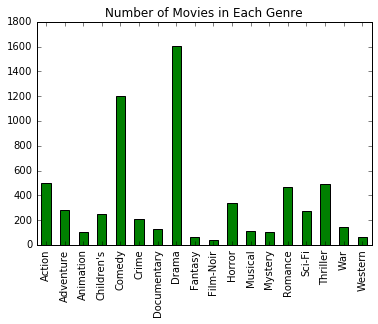

In [86]:
#How many movies for each genre are in this dataset?

moviegenre=movies_windic
moviegenre.drop(moviegenre[[0,1,2]],axis=1,inplace=True)
moviegenre.sum().plot(kind='bar',color='g')
plt.title('Number of Movies in Each Genre')

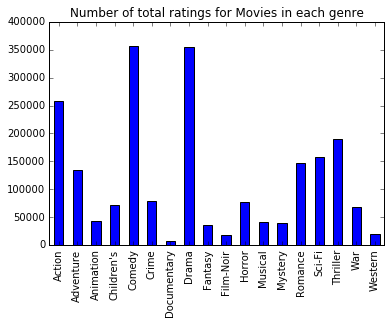

In [87]:
#Total number of ratings received for each type of movie
genres_rating_received=newdata
genres_rating_received.drop(genres_rating_received.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
genres_rating_received.sum().plot(kind='bar')
plt.title('Number of total ratings for Movies in each genre')

In [88]:
average_ratings_genre = (genres_rating_received.sum())*moviegenre.sum()/sum(moviegenre.sum())
average_ratings_genre

Action         20209.249532
Adventure       5915.839419
Animation        709.389045
Children's      2827.510300
Comedy         66775.280899
Crime           2619.093477
Documentary      156.768102
Drama          88687.575999
Fantasy          385.216604
Film-Noir        125.387640
Horror          4088.701311
Musical          738.882959
Mystery          664.617353
Romance        10843.216760
Sci-Fi          6774.835206
Thriller       14563.445693
War             1529.238608
Western          219.482522
dtype: float64

In [89]:
# Percent of movies watched by each gender classified as comedies
genres = data['genres']
all_genres = [string.split('|') for string in genres]
comedy_truth =  [ 'Comedy' in genres for genres in all_genres]
comedy_series = pd.DataFrame(comedy_truth, index=data.index)
data['comedy'] = comedy_series

comedy_data = data.ix[data['comedy'] == True]

comedy_gender_counts = comedy_data.pivot_table('rating', index = 'gender', aggfunc = 'count')
total_gender_counts = data.pivot_table('rating', index = 'gender', aggfunc = 'count')


gender_counts = pd.concat([total_gender_counts,comedy_gender_counts],axis = 1)
gender_counts.columns = ['total_gender_counts', 'comedy_gender_counts']
gender_counts['comedy_gender_percent'] = gender_counts['comedy_gender_counts']/gender_counts['total_gender_counts']
gender_counts

,total_gender_counts,comedy_gender_counts,comedy_gender_percent
gender,,,
F,246440,96271,0.390647
M,753769,260309,0.345343


# What is the best time of day to recommend a drama for each gender?

In [90]:
import time

# convert timestamps to localized hours
timestamps = data['timestamp']
hours = [time.localtime(timestamp).tm_hour for timestamp in timestamps.values]
hour_series = pd.DataFrame(hours, index=data.index)
data['hour'] = hour_series

genres = data['genres']
all_genres = [string.split('|') for string in genres]
drama_truth =  [ 'Drama' in genres for genres in all_genres]
drama_series = pd.DataFrame(drama_truth, index=data.index)
data['drama'] = drama_series

drama_data = data.ix[data['drama'] == True]

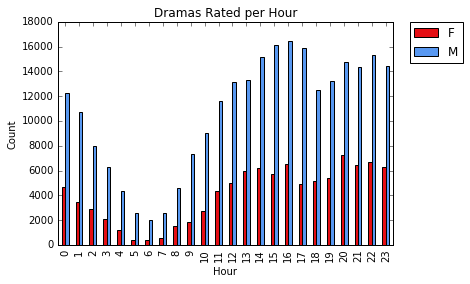

In [91]:
drama_ratings_per_hours=drama_data.pivot_table('title', index='hour', columns = 'gender', aggfunc='count')
drama_ratings_per_hours.plot(kind='bar', color=['#E50E14','#5898f1']).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Dramas Rated per Hour')
plt.ylabel('Count')
plt.xlabel('Hour')

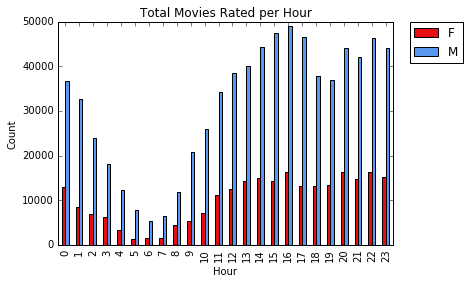

In [92]:
movie_ratings_per_hours=data.pivot_table('title', index='hour', columns = 'gender', aggfunc='count')
movie_ratings_per_hours.plot(kind='bar', color=['#E50E14','#5898f1']).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Movies Rated per Hour')
plt.ylabel('Count')
plt.xlabel('Hour')

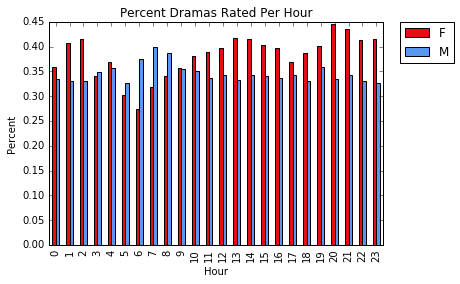

In [93]:
percent_dramas_per_hours = drama_ratings_per_hours/movie_ratings_per_hours
percent_dramas_per_hours.plot(kind='bar', color=['#E50E14','#5898f1']).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percent Dramas Rated Per Hour')
plt.ylabel('Percent')
plt.xlabel('Hour')

The most dramas are rated at 4pm (16th hour) during the day, therefore the best time to recommend a drama is likely before 4pm. To make a more precise determination, instead of our current answer: 'before 4pm,' more data about movie lengths is needed. Since we assume movies are rated after they are viewed, we could use these movie lengths to determine the average start time - which is also the best time to recommend a movie.

# Which occupation is most likely to enjoy a comedy?

In [94]:
# histogram of occupation vs count of comedy ratings
# Percent of movies watched by each gender classified as comedies
genres = data['genres']
all_genres = [string.split('|') for string in genres]
comedy_truth =  [ 'Comedy' in genres for genres in all_genres]
comedy_series = pd.DataFrame(comedy_truth, index=data.index)
data['comedy'] = comedy_series

comedy_data = data.ix[data['comedy'] == True]

occupation
other                   3.492602
academic/educator       3.519583
artist                  3.504449
clerical/admin          3.601516
college/grad student    3.486563
customer service        3.474962
doctor/health care      3.585793
executive/managerial    3.517354
farmer                  3.481363
homemaker               3.579862
K-12 student            3.497200
lawyer                  3.549694
programmer              3.598924
retired                 3.663825
sales/marketing         3.553581
scientist               3.687170
self-employed           3.507570
technician/engineer     3.581290
tradesman/craftsman     3.445350
unemployed              3.401392
writer                  3.423004
Name: rating, dtype: float64
RANGE: 0.285778561855


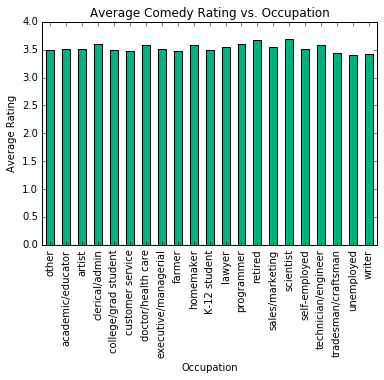

In [95]:
job_avg_ratings = comedy_data.pivot_table('rating', index='occupation', aggfunc=np.mean)
job_avg_ratings.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)
print job_avg_ratings
print "RANGE: %s" % (job_avg_ratings.max() - job_avg_ratings.min())
job_avg_ratings.plot(kind='bar', color='#00b27f')
plt.title('Average Comedy Rating vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')

When comparing the average rating versus occuptation for comedy movies, scientists have the highest average rating (3.687170) followed by retired (3.663825) and clerical/admin (3.601516). Does this mean that those occupations are most likely to enjoy comedies? Possibly, but since we are using mean as our comparison metric and the range of the data is 0.285, we also looked at the number of comedy ratings per occupation. 

occupation
other                   46500
academic/educator       29949
artist                  17982
clerical/admin          11870
college/grad student    48672
customer service         7908
doctor/health care      13148
executive/managerial    35784
farmer                    939
homemaker                5065
K-12 student             9465
lawyer                   7526
programmer              19697
retired                  4340
sales/marketing         17898
scientist                7771
self-employed           15787
technician/engineer     24554
tradesman/craftsman      4172
unemployed               5461
writer                  22092
Name: title, dtype: int64


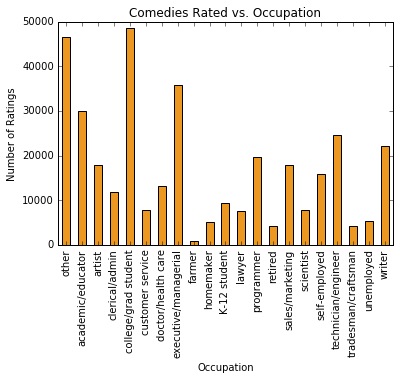

In [96]:
job_total_comedy_ratings = comedy_data.pivot_table('title', index='occupation', aggfunc='count')
job_total_comedy_ratings.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)
print job_total_comedy_ratings
job_total_comedy_ratings.plot(kind='bar', color='#ec971f')
plt.title('Comedies Rated vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')

From the chart, we can see that even though scientist, retired, and clerical/admin have the highest average rating for comedies, they also have low numbers of ratings, 7771, 4340, and 11870 respectively. In contrast, college/grad student, other, and executive/managerial have significantly more ratings (at least triple) 48672, 46500, and 35784 respectively. Although scientist has the highest average rating, it might be better to recommend comedies to students because while they have a lower average rating, they have almost seven times more ratings than scientists. 

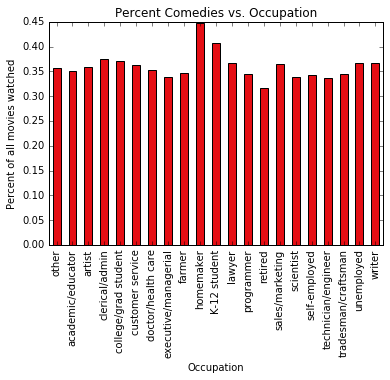

In [97]:
job_total_ratings = data.pivot_table('title', index='occupation', aggfunc='count')
job_total_ratings.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)

job_percent_comedy_ratings = job_total_comedy_ratings / job_total_ratings
job_percent_comedy_ratings.plot(kind='bar', color='#E50E14')
plt.title('Percent Comedies vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percent of all movies watched')

# What age group watches the most adventure movies?

In [98]:
# histogram of age group vs adventure genre
genres = data['genres']
all_genres = [string.split('|') for string in genres]
adventure_truth =  [ 'adventure' in genres for genres in all_genres]
adventure_series = pd.DataFrame(drama_truth, index=data.index)
data['adventure'] = adventure_series

adventure_data = data.ix[data['adventure'] == True]

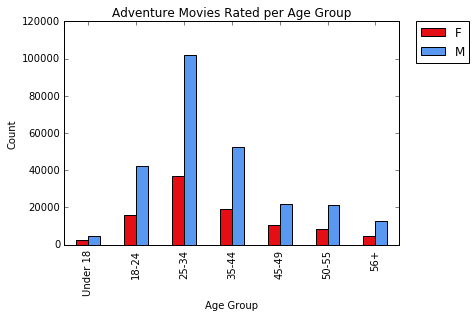

In [99]:
adventure_ratings_per_age = adventure_data.pivot_table('title', index='age', columns='gender', aggfunc='count')
adventure_ratings_per_age.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
adventure_ratings_per_age.plot(kind='bar', color=['#E50E14','#5898f1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Adventure Movies Rated per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

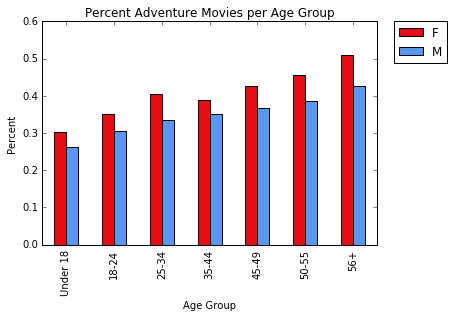

In [100]:
total_per_age = data.pivot_table('title', index='age', columns='gender', aggfunc='count')
total_per_age.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
adventure_percent = adventure_ratings_per_age / total_per_age
adventure_percent.plot(kind='bar', color=['#E50E14','#5898f1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percent Adventure Movies per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percent')

In [101]:
print adventure_ratings_per_age
print total_per_age
print adventure_percent

gender        F       M
age                    
Under 18   2671    4812
18-24     15977   42127
25-34     37052  101643
35-44     19239   52351
45-49     10287   21854
50-55      8237   21010
56+        4690   12579
gender        F       M
age                    
Under 18   8827   18384
18-24     45427  138109
25-34     91340  304216
35-44     49473  149530
45-49     24110   59523
50-55     18064   54426
56+        9199   29581
gender           F         M
age                         
Under 18  0.302594  0.261749
18-24     0.351707  0.305027
25-34     0.405649  0.334115
35-44     0.388879  0.350104
45-49     0.426669  0.367152
50-55     0.455990  0.386029
56+       0.509838  0.425239


## Additional Data Exploration (not used in Problems 1-4)

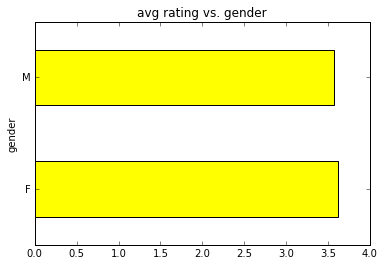

In [102]:
# avg rating vs. gender
gender_avg_ratings = data.pivot_table('rating', index = 'gender',aggfunc = np.mean)
gender_avg_ratings
gender_avg_ratings.plot(kind='barh', color='yellow')
plt.title('avg rating vs. gender')

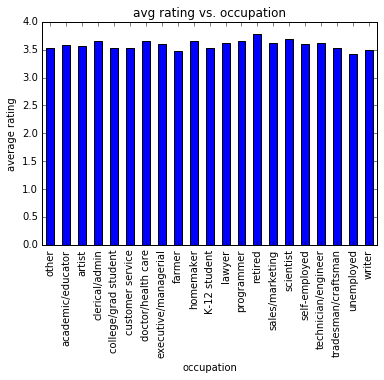

In [103]:
# avg rating vs. occupation
job_avg_ratings = data.pivot_table('rating', index = 'occupation',aggfunc = np.mean)
job_avg_ratings
job=job_avg_ratings.rename(index={0:'other',1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5 :'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'})
job.plot(kind='bar')
plt.title('avg rating vs. occupation')
plt.ylabel('average rating')

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 2".